# Applied Math 115
# Problem Set 1
## Santiago Giner

## Problem 1

The one bit for the sign gives us two possibilities, $\{+, -\},$ the one bit for the exponent, in the simplest case, gives us either 0 or 1 on the exponent, which corresponds to $\{2^0, 2^1\} = \{1, 2\},$ and finally, the bit for the fraction corresponds to $\{0/2^1, 1/2^1\} = \{0, 1/2\}.$ There are two possibilities for each quantity, and therefore there are $2^3 = 8$ total numbers, which correspond to, in notation ($\pm$, $2^e$, $f$),

<ul>
    <li> $(-, 2, 1/2) \to -3$</li>
    <li> $(-, 2, 0) \to -2$</li>
    <li> $(-, 1, 1/2) \to -1.5$</li>
    <li> $(-, 1, 0) \to -1$</li>
    <li> $(+, 1, 0) \to 1$</li>
    <li> $(+, 1, 1/2) \to 1.5$</li>
    <li> $(+, 2, 0) \to 2$</li>
    <li> $(+, 2, 1/2) \to 3$</li>
</ul>

Hence, the possible numbers are $\{-3, -2, -1.5, -1, 1, 1.5, 2, 3\}.$

## Problem 2

Recall that the backward Euler method uses the formula

\begin{equation}
    y_{n + 1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1}),
\end{equation}

where $dy/dt = f(t, y).$ For the test problem $dy/dt = \lambda y,$ we can plug this into the formula above and solve for $y_{n+1},$ to obtain

\begin{equation}
    y_{n + 1} = \frac{y_n}{1 - \lambda \Delta t}.
\end{equation}

Letting $z = \lambda \Delta t,$ we can easily that the $n^{\rm{th}}$ data point we obtain can be related to the initial condition $y_0$ via

\begin{equation}
    y_n = \frac{1}{(1 - z)^n} y_0
\end{equation}

Taking the modulus of both sides, we find

\begin{equation}
    |y_n| = \frac{1}{|1 - z|^n} |y_0|.
\end{equation}

Therefore, the stability condition that $y_n \not \to \infty$ as $t \to \infty$ requires that

\begin{equation}
    \frac{1}{|1 - z|} < 1 \implies \boxed{|1 - z| > 1.}
\end{equation}

We plot this stability region in the complex plane below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

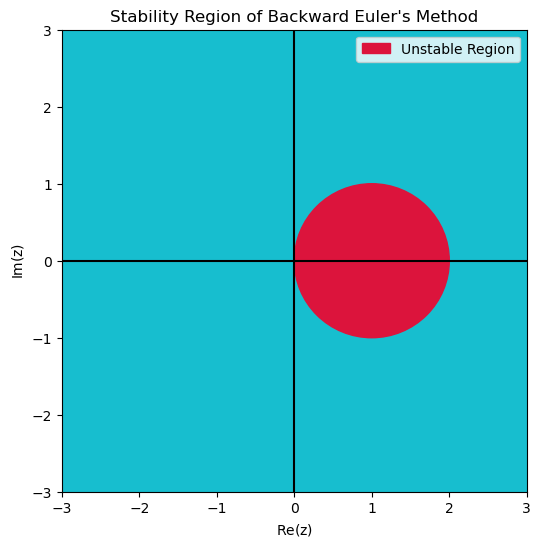

In [2]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(1 - 2*X + X**2 + Y**2)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#cp = ax.contourf(X, Y, Z)
#fig.colorbar(cp) # Add a colorbar to a plot
circle1 = Circle((1, 0), radius=1, color='crimson', label='Unstable Region')
ax.set_facecolor('tab:cyan')
ax.add_patch(circle1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax.legend()

ax.axvline(0, color="black"); ax.axhline(0, color="black")
ax.set_title("Stability Region of Backward Euler's Method")
ax.set_xlabel(r'$\rm{Re}(z)$')
ax.set_ylabel(r'$\rm{Im}(z)$')
plt.show()

The plot above shows the stability region for the backward Euler method; specifically, any values of $\rm{Re}(z), \rm{Im}(z)$ lying outside the red region will satisfy the condition that $y_n$ does not go to infinity as $t \to \infty,$ while anything inside the red region <em> will </em> go to infinity as $t \to \infty.$

Below we also plot the stability region of the forward Euler method.

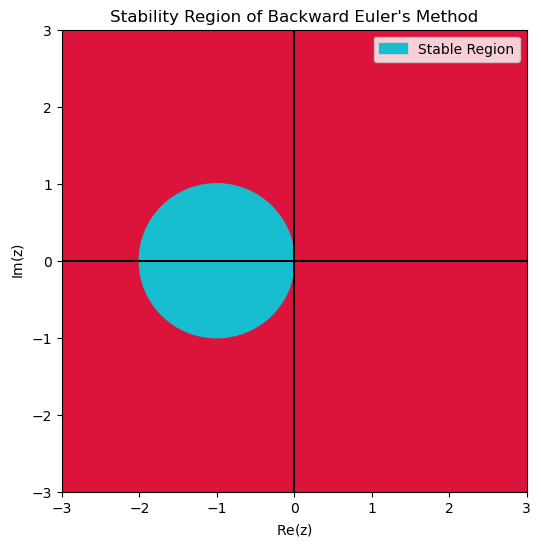

In [3]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
circle1 = Circle((-1, 0), radius=1, color='tab:cyan', label='Stable Region')
ax.set_facecolor('crimson')
ax.add_patch(circle1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax.legend()

ax.axvline(0, color="black"); ax.axhline(0, color="black")
ax.set_title("Stability Region of Backward Euler's Method")
ax.set_xlabel(r'$\rm{Re}(z)$')
ax.set_ylabel(r'$\rm{Im}(z)$')
plt.show()

Notice that the stability region for the backward method is infinite, whereas that of the forward method is finite, corresponding to all values of $z$ such that $|z + 1| < 1.$

### Problem 2, Part b

The forward Euler's method is an explicit method, and this is due to the fact that at every time step, the $y_{n+1}$ is given by the current status of the system, i.e. it is completely determined, explicitly, by the time $t_{n}$ and the value $y_n,$ as we can see in its formula from class. By contrast, the backward Euler's method is implicit, because at every time step, the equation that gives $y_{n+1}$ involves $y_{n+1}$ itself, and therefore the current status of the system does not determine the new value at a new timestep; instead, we need to <em> solve </em> the equation we get for the variable $y_{n+1},$ and therefore the method is implicit rather than explicit.

### Problem 2, Part c

The implicit method has a smaller stability region compared to the explicit method. This is important because it means that the explicit method will be stable, i.e. will not diverge, for more values of $z = \lambda \Delta t,$ so we can apply it to solve more equations with different values of $z,$ as opposed to the implicit method, which has a finite region of stability.

## Problem 3

### Problem 3, Part a

In [4]:
''' Function defintions for both of Euler's methods '''
# Forward Euler method
def forward_Euler(t_end, t_0, dt, y_0, lam):
    # Find number of time steps given interval and time step width
    n_times = round((t_end - t_0) / dt + 1.e-6)
    # Initialize arrays and set initial conditions
    t, y = np.zeros(n_times), np.zeros(n_times).astype(complex)
    t[0], y[0] = t_0, y_0
    # Iterate through each time step and apply Euler's forward formula at every step
    for i in range(n_times - 1):
        t[i + 1] = t[i] + dt
        y[i + 1] = y[i] + dt * lam * y[i]
    return t, y

# Backward Euler method
def backward_Euler(t_end, t_0, dt, y_0, lam):
    # Find number of time steps given interval and time step width
    n_times = round((t_end - t_0) / dt + 1e-6)
    # Initialize arrays and set initial conditions
    t, y = np.zeros(n_times), np.zeros(n_times).astype(complex)
    t[0], y[0] = t_0, y_0
    # Iterate through each time step and apply Euler's backward formula at every step
    for i in range(n_times - 1):
        t[i + 1] = t[i] + dt
        y[i + 1] = y[i] / (1 - dt * lam)
    return t, y

In [5]:
''' Matplotlib customization, from class '''
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

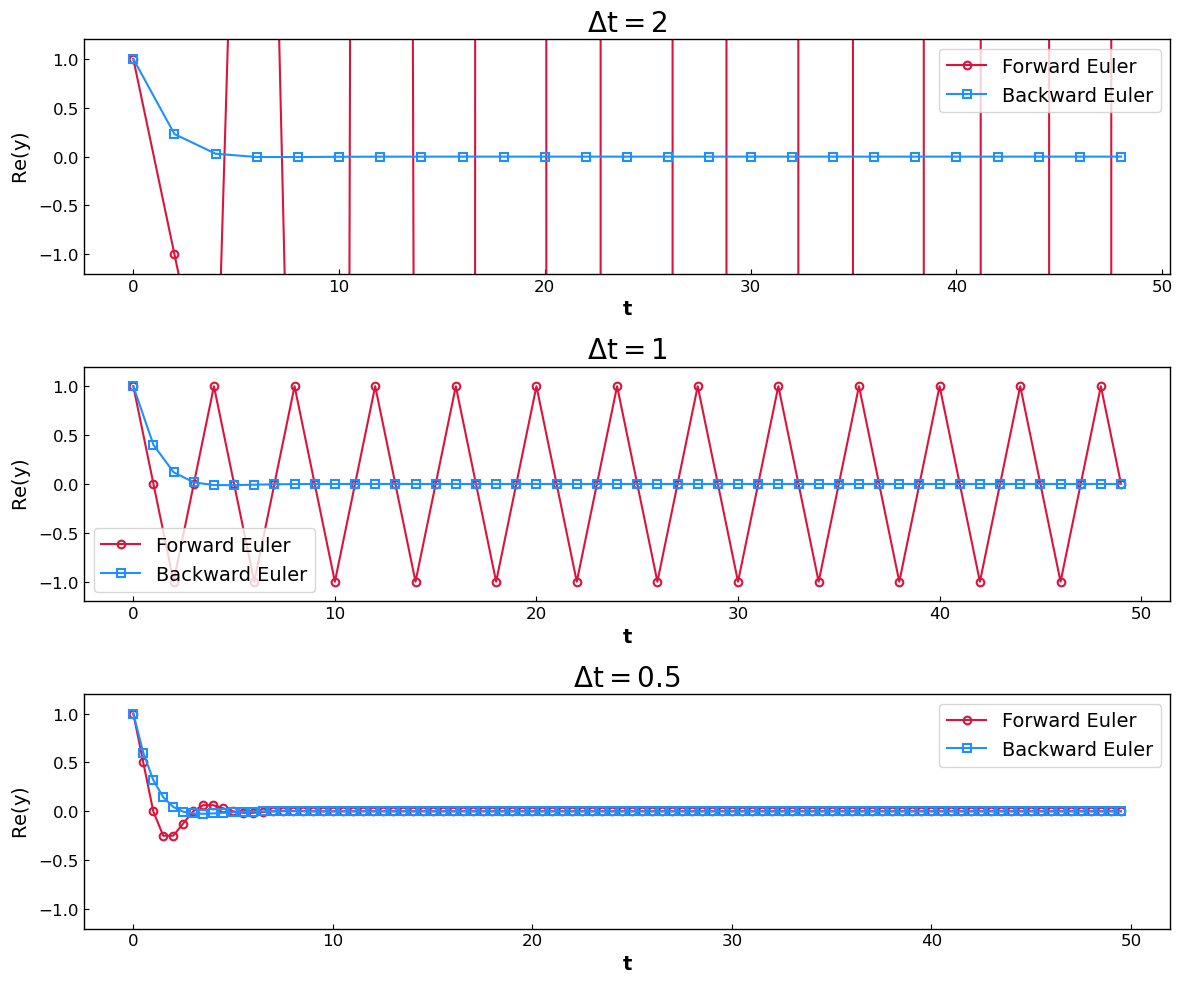

In [6]:
''' Test the Implementations '''
# Initial conditions and lambda parameter
t_0, t_end = 0, 50
y_0 = 1
lam = -1 + 1j

# Time step widths to try
dt_try = [2, 1, 0.5]

# Prepare figure to plot in
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

''' Plotting lines are from class notebook '''
# Iterate over every time step width
for i, dt in enumerate(dt_try):
    t, y_forward = forward_Euler(t_end, t_0, dt, y_0, lam)
    t, y_backward = backward_Euler(t_end, t_0, dt, y_0, lam)

    # Plot forward solution
    ax[i].plot(t, np.real(y_forward), '-o', linewidth=1.5, color='crimson', mfc='none', ms=5.5, mew=1.5, label='Forward Euler')
    
    # Plot backward solution
    ax[i].plot(t, np.real(y_backward), '-s', linewidth=1.5, color='dodgerblue', mfc='none', ms=5.5, mew=1.5, label='Backward Euler')
    
    # Set axes axes' limits and labels and titles
    ax[i].set_ylim(-1.2, 1.2)
    ax[i].set_xlabel(r'$t$')
    ax[i].set_ylabel(r'$\rm{Re}(y)$')
    ax[i].set_title(f'$\Delta t = {dt}$', fontsize=20)
    ax[i].legend()
    
fig.tight_layout()
plt.show()

These results make sense with regards to the results of Problem 2. We can see that the forward solution is generally more unstable, as expected. In particular, we can verify whether each value of $\Delta t$ corresponds to a value of $z$ in the stability region of each solver.

<ul>
    <li> 
        $\Delta t = 2: z = -2 + 2i$
        <br>
        $|z - 1| = \sqrt{13} > 1 \to$ backward solution is stable
        <br>
        $|z + 1| = \sqrt{5} \not < 1 \to$ forward solution is unstable
    </li>
    <li> 
        $\Delta t = 1: z = -1 + i$
        <br>
        $|z - 1| = \sqrt{5} > 1 \to$ backward solution is stable
        <br>
        $|z + 1| = 1  \to$ forward solution falls exactly between the unstable and stable region, meaning that the solution will oscillate at every time step, since $y_n = (i^n) \cdot y_0,$ so $Re(y_n)$ will alternate between $\pm y_0,$ which is exactly what we see in the second plot above
    </li>
    <li> 
        $\Delta t = 0.5: z = (-1 + i) / 2$
        <br>
        $|z - 1| = \sqrt{10}/2 > 1 \to$ backward solution is stable
        <br>
        $|z + 1| = 1/\sqrt{2} < 1 \to$ forward solution is stable
    </li>
</ul>

These calculations confirm the behavior we see in each of the corresponding plots above.

### Problem 3, Part b

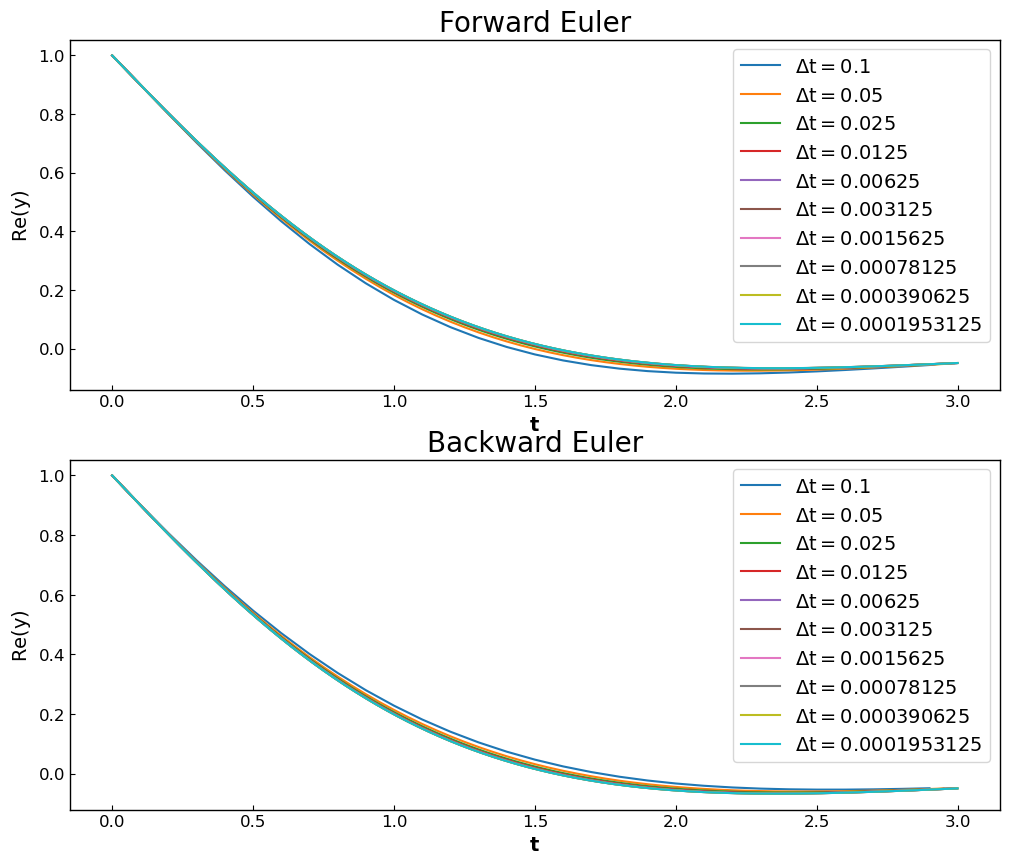

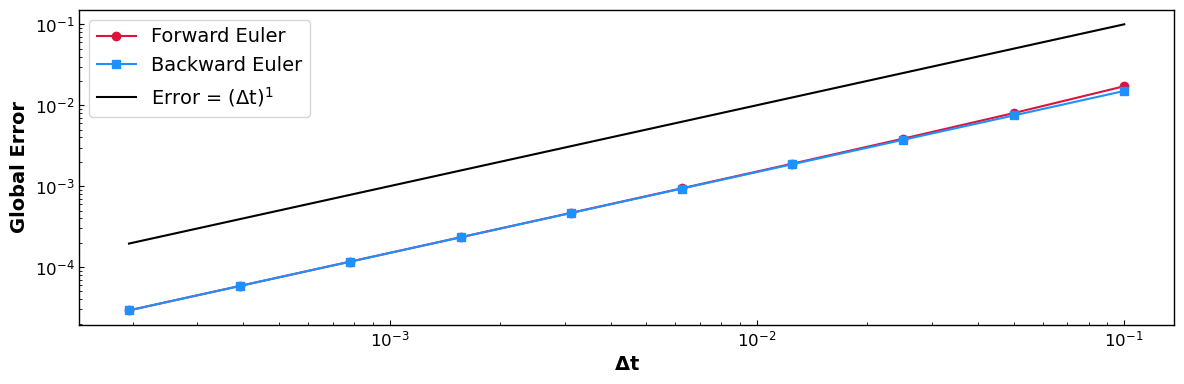

In [7]:
''' Evaluating global error '''
# First calculate the exact solution
# t_exact = np.linspace(0, 3, 10**4)
# y_exact = y_0 * np.exp(lam * t_exact)

# Initial conditions
t_0, t_end = 0, 3
y_0 = 1
lam = -1 + 1j

# Time step widths to use
k_arr = np.arange(10)
dt_try_b = np.array([0.1 / 2**k for k in k_arr])

# Array in which to store global errors
forward_errors, backward_errors = [], []

fig, ax = plt.subplots(2, 1, figsize=(12, 10))


# Get forward and backward Euler solutions
for dt in dt_try_b:
    t, y_forward = forward_Euler(t_end, t_0, dt, y_0, lam)
    t, y_backward = backward_Euler(t_end, t_0, dt, y_0, lam)
    # Calculate exact solution at last step
    y_exact_last = y_0 * np.exp(lam * t[-1])
    forward_errors.append(np.abs(y_forward[-1] - y_exact_last))
    backward_errors.append(np.abs(y_backward[-1] - y_exact_last))
    
    # Plot forward solution
    ax[0].plot(t, np.real(y_forward), '-', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label=f'$\Delta t = {dt}$')

    # Plot backward solution
    ax[1].plot(t, np.real(y_backward), '-', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label=f'$\Delta t = {dt}$')
    
# Set axes labels and title
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$\rm{Re}(y)$')
ax[0].set_title('Forward Euler', fontsize=20)
ax[0].legend()

ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$\rm{Re}(y)$')
ax[1].set_title('Backward Euler', fontsize=20)
ax[1].legend()
    
# Plot the global errors
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(dt_try_b, forward_errors, '-o', label='Forward Euler', color='crimson')
ax.plot(dt_try_b, backward_errors, '-s', label='Backward Euler', color='dodgerblue')
# Add error = (Delta t)^1 line for comparison
ax.plot(dt_try_b, dt_try_b, color='k', label=r'Error = $(\Delta t)^1$')
ax.loglog()
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel('Global Error')
ax.legend()

fig.tight_layout()
plt.show()

We can see from the plot above that the relationship between error and time step used, $\Delta t,$ follows a linear power-law, namely, Error $\sim (\Delta t)^1,$ up to some proportionality constant. The black curve shows the relationship Error $= (\Delta t)^1$ for reference. This is exactly the statement that both the forward and backward Euler methods are first-order accurate.

## Problem 4

In [8]:
# Import solve_ivp
from scipy.integrate import solve_ivp

In [9]:
# Define the vector function corresponding to
# dy_1/dt = y_2, dy_2/dt = -sin(y_1)
f = lambda t, y: [y[1], -np.sin(y[0])]

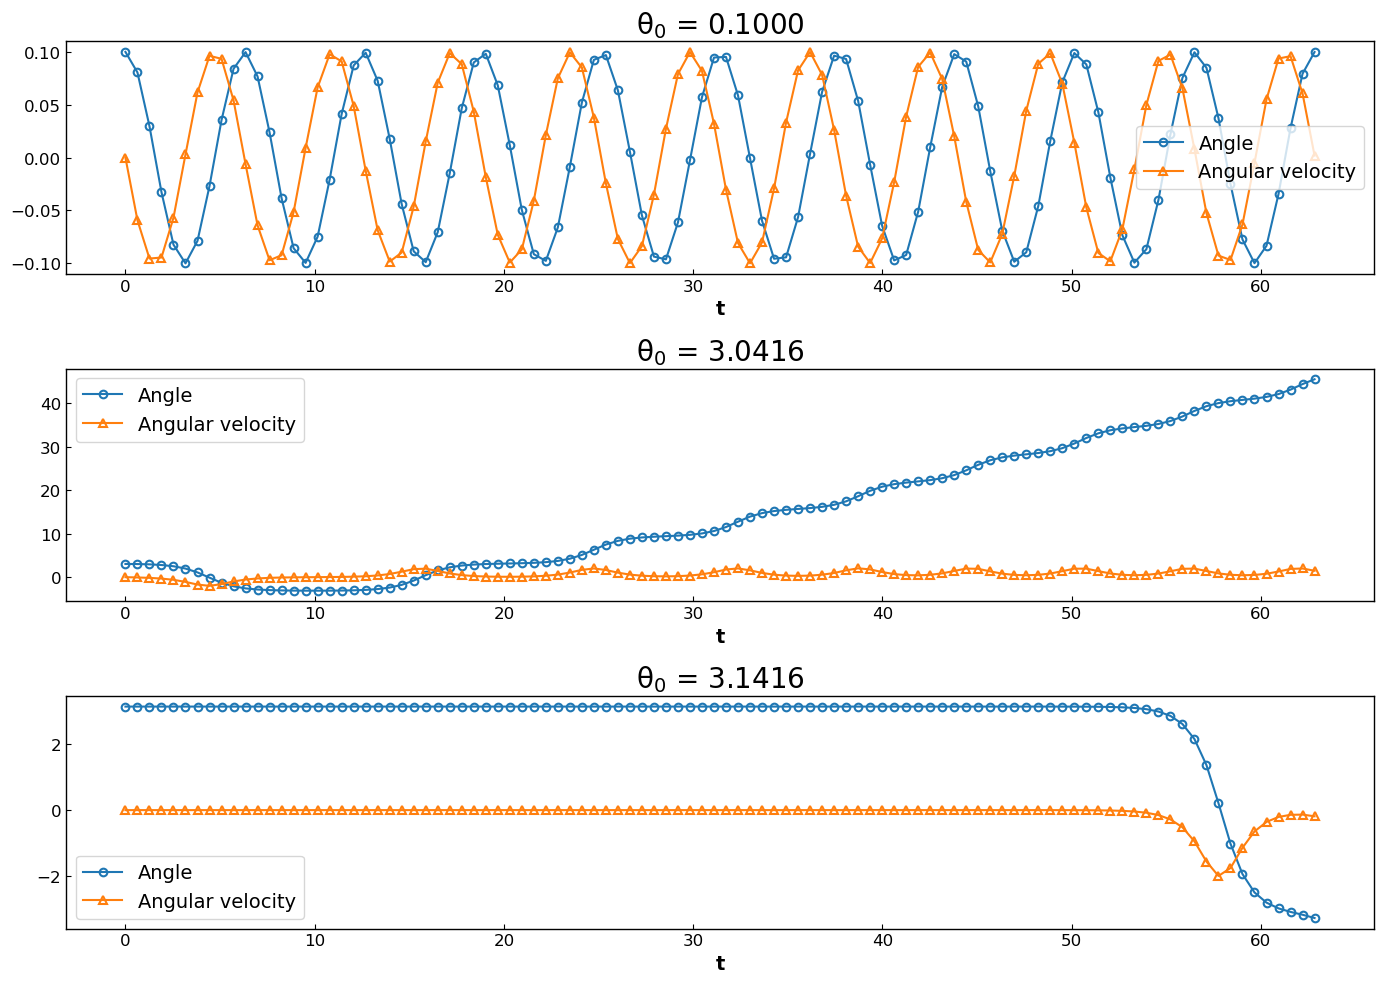

In [10]:
''' Solving the problem for different initial angles '''
# Values of initial angle to try
theta_try = [0.1, np.pi - 0.1, np.pi]

# Initial angular velocity is always 0
dtheta_dt_0 = 0

# Time interval to solve for
t_int = [0, 20 * np.pi]

# Figure in which to plot results
fig, ax = plt.subplots(3, 1, figsize=(14, 10))

# Iterate over initial angles
for i, theta_0 in enumerate(theta_try):
    # Call solve_ivp
    sol = solve_ivp(f, t_int, [theta_0, dtheta_dt_0], t_eval=np.linspace(0, 20 * np.pi, 100))
    t, y = sol.t, sol.y
    ax[i].plot(t, y[0, :], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
    ax[i].plot(t, y[1, :], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')
    ax[i].set_xlabel(r'$t$')
    ax[i].set_title(f'$\\theta_0$ = {theta_0:.4f}', fontsize=20)
    ax[i].legend()

fig.tight_layout()
plt.show()

In the last case, where $\theta_0 = \pi,$ we can see that the numerical solution does **not** match the exact solution. If the pendulum starts out at $\theta_0 = \pi,$ then initially we have $d\theta/dt = y_2 = 0,$ but also, $d^2\theta/dt = dy_2/dt = -sin(\pi) = 0,$ and so we are at a fixed point of the vector $(y_1(t), y_2(t)),$ meaning that the system should stay there (barring any small perturbations that may actually occur in the real world). What we actually see in the last plot above is that, initially, the pendulum does remain fixed, but at about $t = 58,$ the angle abruptly decreases, meaning the pendulum has started to fall down.

The reason why the numerical solution suddenly deviates from the exact one has to do with the accumulation of numerical errors. In particular, notice what happens in Python when we calculate $\sin{\pi}:$

In [11]:
np.sin(np.pi)

1.2246467991473532e-16

We can see that $\sin{\pi}$ is not exactly 0 when we evaluate it in Python but instead a *very* small number. However small this number is, though, it is still nonzero, and this error accumulates with every time step until it can reach a point where $dy_2/dt = -\sin(y_1) = -\sin(\theta)$ becomes non-negligible and the pendulum starts to swing, which is indeed what we see happening with this solver.

It is worth noting that this rapid decay from the fixed point at $\theta = \pi$ is at all possible because of the fact that it is an unstable fixed point, which we can see more clearly if we look at the eigenvalues of the matrix form of the system of equations near $\theta = y_1 = \pi.$ Near this fixed point, we can approximate $\sin(y_1)$ via a Taylor expansion to get

$$\frac{dy_2}{dt} = -\sin(y_1) \approx -\sin(\pi) + \left. \frac{d}{dy_1}(-\sin(y_1))\right|_{y_1=\pi}(y_1 - \pi).$$

From which we obtain

$$\frac{dy_2}{dt} \approx y_1 - \pi.$$

Defining a new variable $\tilde{y_1}$ as the displacement from $y_1 = \pi,$ we can rewrite the pendulum's system of ODEs as

$$\begin{pmatrix}\frac{d\tilde{y_1}}{dt} \\ \frac{dy_2}{dt} \end{pmatrix} = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix}\tilde{y_1} \\ y_2\end{pmatrix}.$$

The matrix above has eigenvalues $\lambda = \pm 1,$ where the $\lambda = -1$ eigenvalue corresponds to exponential decay towards the fixed point and the $\lambda = +1$ eigenvalue corresponds to an exponential growth away from the fixed point. It is the presence of this latter, positive eigenvalue that implies that fluctuations from the fixed point can indeed result in growth away from it, contrary to a stable point, where both eigenvalues would be negative and therefore any fluctuation from the fixed point will decay and come back to that point.

#### Using a solver for stiff problems

In this case, we will also use the `solve_ivp` function from `scipy`, but we must tell it to use a method for solving stiff ODE problems, which can be, e.g., `Radau` or `BDF`. We will use the `Radau` method.

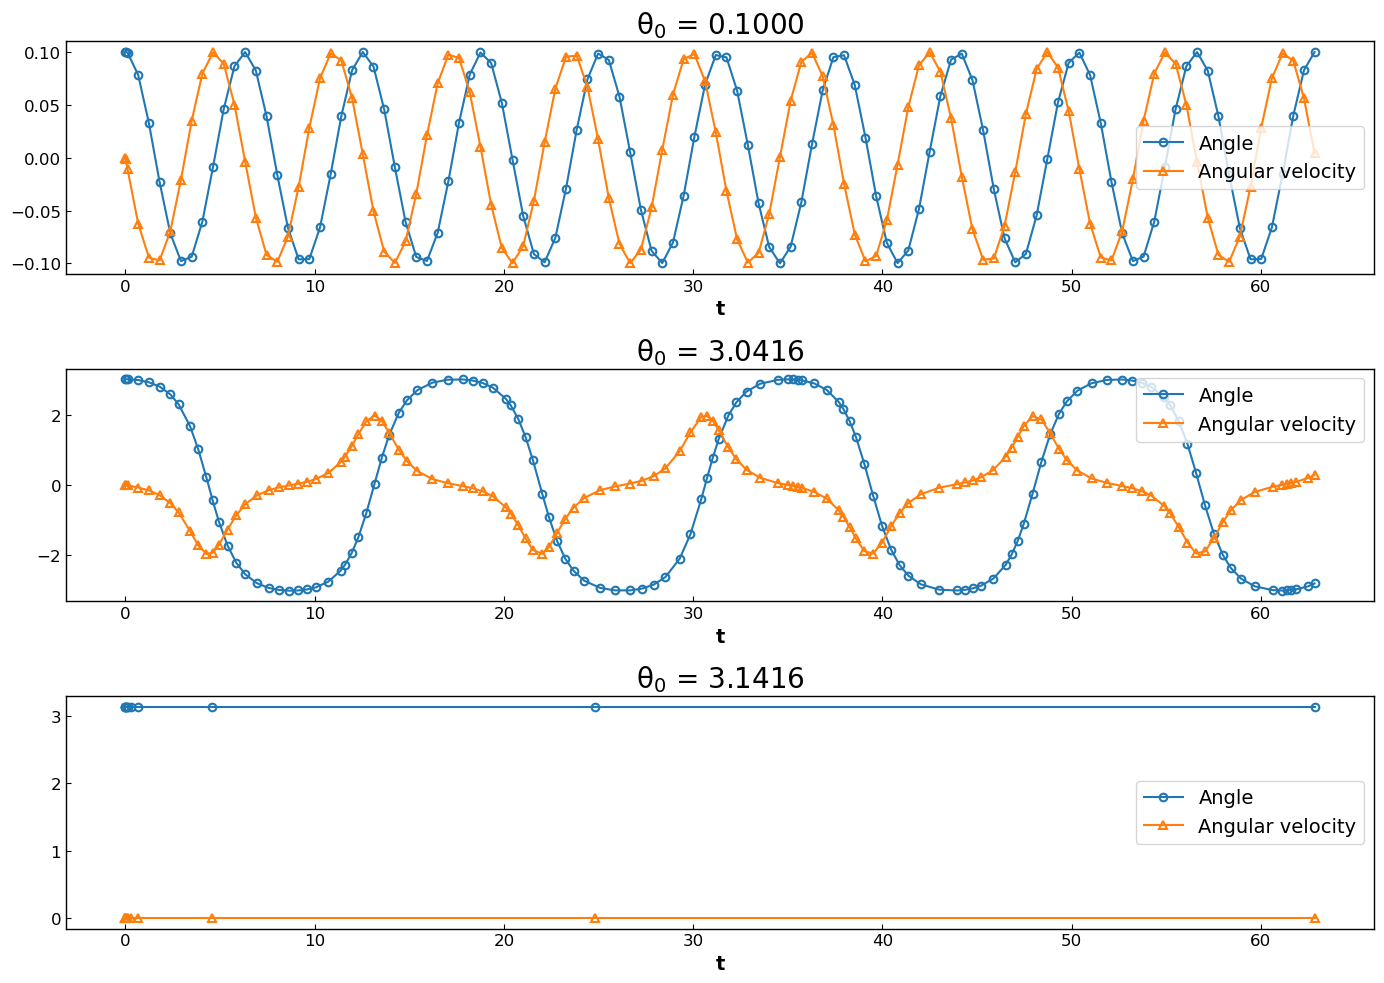

In [12]:
''' Solving the problem for different initial angles '''
# Values of initial angle to try
theta_try = [0.1, np.pi - 0.1, np.pi]

# Initial angular velocity is always 0
dtheta_dt_0 = 0

# Time interval to solve for
t_int = [0, 20 * np.pi]

# Figure in which to plot results
fig, ax = plt.subplots(3, 1, figsize=(14, 10))

# Iterate over initial angles
for i, theta_0 in enumerate(theta_try):
    # Call solve_ivp
    sol = solve_ivp(f, t_int, [theta_0, dtheta_dt_0], method='Radau')
    t, y = sol.t, sol.y
    ax[i].plot(t, y[0, :], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
    ax[i].plot(t, y[1, :], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')
    ax[i].set_xlabel(r'$t$')
    ax[i].set_title(f'$\\theta_0$ = {theta_0:.4f}', fontsize=20)
    ax[i].legend()

fig.tight_layout()
plt.show()

We can see that the stiff solver perfectly captures the behavior of the exact solution for $\theta = \pi,$ as the angle and angular velocity both remain constant at their initial values of $\pi$ and 0, respectively. Recall that the solvers for non-stiff problems use explicit methods, while the stiff solvers use implicit methods, and as we have seen, the implicit solvers have a much larger region of stability than their explicit counterparts. Therefore, it makes sense that the stiff solver is able to give a solution which reproduces the exact answer. The question of whether the stiff solver is "better" than the non-stiff one is not, however, something that can be answered generally. For instance, consider the fact that a pendulum in the real world that starts out upside down at $\theta = \pi$ will eventually fall to one side, due to the random, unstable nature of the real world, in which case one could make the argument that the non-stiff solver exemplifies the behavior of a real-world pendulum (though not exactly since we have not input the model any details regarding fluctuations in the real world). Therefore, the answer to which is "better" must be addressed on a case-by-case basis and depends on the final goals of our model. What we *can* say is that the stiff problem, with its larger stability region, is able to reproduce what we expect from an exact solution, while numerical errors accumulate and affect the answer from the non-stiff solver.